# ÁRBOLES DE DECISIÓN

## Objetivo de esta lección

Aprender en profundidad el algoritmo que en mi opinión es el más importante en la aplicación de machine learning en ámbitos empresariales.

Digo esto porque:

* En contextos donde necesitemos alta explicabilidad, éste es el algoritmo más fácilmente explicable a un perfil de negocio
* En contextos donde necesitemos alta precisión, son algoritmos basados en árboles (que aprenderemos más adelante) los que actualmente están consiguiendo mejores resultados

## FICHA DEL ALGORITMO

### Ámbito de aplicación

Los árboles se pueden aplicar tanto en ámbitos de clasificación como de regresión.

Sklearn tiene una clase diferente para cada caso:

* Para clasificación: DecisionTreeClassifier()
* Para regresión: DecisionTreeRegressor()

Se diferencian principalmente en la métrica que usan para hacer los splits: el clasificador usa el índice de Gini mientras que el regresor usa la reducción del MSE.

La versión estandar de árboles de decisión es especialmente recomendada en proyectos donde tengamos que explicar el por qué de las predicciones: prevención de abandono, oportunidades a redes comerciales, decisiones de inversión, etc.

### Pros

* Algoritmo sencillo
* Muy alta explicabilidad
* Cubre clasificación y regresión
* Alta portabilidad
* Rápida ejecución
* No necesita casi preparación de datos
* Captura muy bien relaciones no lineales
* No tiene hipótesis a cumplir

### Contras

* Tiende a sobre ajustar
* Si la relación fuera muy lineal puede generar incosistencias (una unidad más en el predictor hace que vaya por otra rama)
* No tiene una capacidad predictiva top
* A partir de ciertos niveles (que se alcanzan fácil en contextos de negocio) ya se pierde la explicabilidad

### Necesidad de preprocesamiento

No sensible a outliers.

No hace falta escalado.

No hace falta preselección de variables.

Básicamente sólo hay que preocuparse de los nulos porque Sklearn no los gestiona (en otras implementaciones ni eso) y de hacer enconding de las variables categóricas por el mismo motivo.

### Supuestos e hipótesis

No tiene.

### Sobre ajuste

Tiende a sobre ajustar. 

Hay dos métodos principales para evitarlo:

1. Optimizar estos con hiperparametrización:

* Poner valores más bajos a max_depth o max_leaf_nodes
* Incrementar min_impurity_decrease
* Poner valores más altos a min_samples_split y min_samples_leaf

2. Hacer post-poda con el parámetro de complejidad: ccp_alpha

### Grado de interpretación

Muy alto.

La salida son reglas si entonces, y también lo podemos sacar en forma de gráfico.

### Importación

En Sklearn la versión de clasificación y la de regresión vienen implementados en diferentes funciones.

In [55]:
#Clasificación
from sklearn.tree import DecisionTreeClassifier

#Regresión
from sklearn.tree import DecisionTreeRegressor

### CLASIFICACIÓN

#### Principales parámetros

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

* criterion: la métrica para el split, por defecto es 'gini' pero también podemos usar 'entropy'
* max_depth: el número de niveles máximo del árbol. CUIDADO, por defecto lo expandirá al máximo, lo cual en proyectos reales es un riesgo. Ponerle siempre un límite de partida, aunque sea alto
* max_leaf_nodes: el número de nodos máximo del árbol. CUIDADO, por defecto lo expandirá al máximo, lo cual en proyectos reales es un riesgo. Ponerle siempre un límite de partida (si no lo has puesto ya a max_depth), aunque sea alto
* min_samples_split: mínimo de registros que tiene que tener un nodo para que divida
* min_samples_leaf: mínimo de registros que tiene que tener un nodo hijo para que se divida el padre
* class_weight: para ponderar las clases. Se puede balancear directamente poníendolo a 'balanced'
* ccp_alpha: parámetro de complejidad, para la poda

#### Principales atributos de resultado

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

* feature_importances_: para ver la importancia de cada variable

#### Principales métodos

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

* fit(): para entrenar
* predict_proba(): para generar el scoring
* get_params(): para extraer los parámetros del modelo entrenado
* apply(): para conocer el nodo terminal en el que cayó cada registro
* cost_complexity_pruning_path(): para hacer la post-poda

### REGRESIÓN

#### Principales parámetros

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

* criterion: la métrica para el split, por defecto es 'mse' pero también podemos probar otras
* max_depth: el número de niveles máximo del árbol. CUIDADO, por defecto lo expandirá al máximo, lo cual en proyectos reales es un riesgo. Ponerle siempre un límite de partida, aunque sea alto
* max_leaf_nodes: el número de nodos máximo del árbol. CUIDADO, por defecto lo expandirá al máximo, lo cual en proyectos reales es un riesgo. Ponerle siempre un límite de partida (si no lo has puesto ya a max_depth), aunque sea alto
* min_samples_split: mínimo de registros que tiene que tener un nodo para que divida
* min_samples_leaf: mínimo de registros que tiene que tener un nodo hijo para que se divida el padre
* ccp_alpha: parámetro de complejidad, para la poda

#### Principales atributos de resultado

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

* feature_importances_: para ver la importancia de cada variable

#### Principales métodos

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

* fit(): para entrenar
* predict(): para generar el scoring
* get_params(): para extraer los parámetros del modelo entrenado
* apply(): para conocer el nodo terminal en el que cayó cada registro
* cost_complexity_pruning_path(): para hacer la post-poda

### Cómo podar un árbol

Para hacer la post-poda de un árbol hay que seguir un método de cierta complejidad.

Por ello en vez de explicártelo aquí de forma teórica te lo explicaré más abajo en la sección del ejemplo para ir haciéndolo según lo vayamos explicando.

## EJEMPLO

### Opciones y paquetes

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

### Importación de datos

Vamos a usar el dataset sintético de target binaria.

In [29]:
#Cargamos el dataset sintetico_binaria.csv que está en 00_DATASETS
df = pd.read_csv('../00_DATASETS/sintetico_binaria.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,-0.266432,-1.649948,-0.349640,-1.522604,2.566878,1.495543,-2.190401,-0.397880,1.915840,0
1,-0.957055,0.010025,-0.016071,-1.503270,0.450517,0.618956,-0.717107,0.158979,0.334379,1
2,1.749467,-1.314553,-0.448371,-2.182398,-2.015897,-0.914221,-2.577705,1.032420,2.396877,1
3,-1.853083,-1.678272,1.285303,-0.580328,-0.878353,-0.574685,-0.440330,2.617362,-1.206825,0
4,0.983757,-0.528091,2.335109,-0.485462,2.063985,3.615928,-2.418671,1.053133,1.412055,1
...,...,...,...,...,...,...,...,...,...,...
995,0.137035,-0.651149,0.506537,-0.808918,0.121417,0.275886,-0.631953,1.200345,-0.408929,0
996,-0.611333,1.640563,2.731870,-1.303258,-0.074655,2.681244,0.275025,-1.869411,2.484661,0
997,0.999843,-1.650038,1.067600,-0.676316,-2.278678,-1.067705,-1.449736,3.841241,-1.129555,0
998,-0.788198,0.541500,3.307268,-0.394564,-1.839605,2.814642,-3.555806,6.302001,-1.799188,0


### Modelo

#### Separar predictoras y target

In [30]:
x = df.drop(columns = 'target')
y = df['target']

#### Separar train y test

In [31]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3)

#### Entrenar el modelo

In [32]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=10)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=10)

#### Predecir sobre test

In [33]:
pred = ac.predict_proba(test_x)[:, 1]
pred[:50]

array([0.        , 0.        , 1.        , 1.        , 0.02727273,
       1.        , 0.        , 0.02727273, 0.17241379, 0.02727273,
       0.17241379, 0.        , 0.15384615, 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.17241379, 1.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.02727273, 0.        , 0.        , 1.        ,
       0.02727273, 0.02727273, 0.        , 0.        , 0.        ,
       0.02727273, 0.02727273, 0.17241379, 1.        , 0.02727273,
       0.15384615, 1.        , 0.        , 0.        , 0.        ])

#### Evaluar sobre test

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.6599019110434636

#### Cómo podar un árbol

Decíamos que para evitar el sobre ajuste tenemos 2 alternativas:

* Ajustar los parámetros de límite con hiperparametrizcaión (lo veremos en su lección correpondiente)
* Hacer post-poda con el parámetro de complejidad: ccp_alpha

ccp_alpha es un parámetro interno que no podemos darle una interpretación, pero sí sabemos que cuanto mayor alpha más poda, y por tanto tendremos un modelo con menos niveles y más sencillo.

Como sabemos de cuando estudiamos el sesgo-varianza lo que queremos es ir incrementando la complejidad para ir reduciendo el sesgo, pero hasta el momento en el que empecemos a subir la varianza.

El problema es que no sabemos a priori qué valor de alpha puede conseguir ese resultado.

Pero Sklearn tiene el método cost_complexity_pruning_path() que precisamente nos devuelve todos los niveles de complejidad (alphas) por los que ha pasado un árbol en su crecimiento.

Así que tenemos que seguir una estrategia empírica que tiene los siguientes pasos:

1. Establecer un criterio pre para que no se haga un árbol inmanejable
2. Estimar alpha para los diferentes niveles de complejidad
3. Generar una lista con un arbol para cada valor de alpha
4. Calcular la relación entre alpha y la métrica de evaluación (ej AUC)
5. Calcular la relación entre alpha y los niveles de profundidad
6. Decidir el criterio final y reentrenar el árbol

Esta estrategia que ahora hacemos de forma "más manual" podremos sustuirla por otra más automática cuando aprendamos la hiperparametrización, ya que en el fondo ccp_alpha es un parámetro más.

Pero de momento vamos a aprender el proceso paso a paso para interiorizar los conceptos.

**1. Establecer un criterio pre para que no se haga un árbol inmanejable**

Vamos a entrenar un árbol con una profundidad de 10 niveles

In [35]:
#Instanciar
ac = DecisionTreeClassifier(max_depth=10)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=10)

**2. Estimar alpha para los diferentes niveles de complejidad**

Extraemos los alphas con el método cost_complexity_pruning_path() sobre el árbol entrenado

In [36]:
alphas = ac.cost_complexity_pruning_path(train_x, train_y)['ccp_alphas']
alphas

array([0.        , 0.00061576, 0.0007483 , 0.00126984, 0.0012935 ,
       0.00131792, 0.00136054, 0.00141814, 0.00153541, 0.00190476,
       0.00190476, 0.00190476, 0.00210989, 0.00214286, 0.00214286,
       0.00228571, 0.00228571, 0.00238095, 0.00242224, 0.00243489,
       0.00244898, 0.00247619, 0.0025    , 0.002501  , 0.00253968,
       0.00261224, 0.00267857, 0.0027551 , 0.00277056, 0.00285714,
       0.00321906, 0.0037878 , 0.00435374, 0.004375  , 0.00445055,
       0.00445507, 0.00450835, 0.0050305 , 0.00507742, 0.005287  ,
       0.00595277, 0.00628953, 0.0078403 , 0.00905051, 0.01367408,
       0.01442209, 0.0147294 , 0.08493088])

**3. Generar una lista con un arbol para cada valor de alpha**

Vamos generando un árbol con cada valor de alpha, para después poder compararlos

In [37]:
arboles = []

for alpha in alphas:
    arbol = DecisionTreeClassifier(ccp_alpha=alpha)
    arbol.fit(train_x, train_y)
    arboles.append(arbol)

arboles

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0006157635467980275),
 DecisionTreeClassifier(ccp_alpha=0.0007482993197278917),
 DecisionTreeClassifier(ccp_alpha=0.0012698412698412698),
 DecisionTreeClassifier(ccp_alpha=0.001293500715080248),
 DecisionTreeClassifier(ccp_alpha=0.0013179169823465155),
 DecisionTreeClassifier(ccp_alpha=0.0013605442176870752),
 DecisionTreeClassifier(ccp_alpha=0.0014181438998957204),
 DecisionTreeClassifier(ccp_alpha=0.001535410402405471),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048),
 DecisionTreeClassifier(ccp_alpha=0.002109890109890109),
 DecisionTreeClassifier(ccp_alpha=0.002142857142857143),
 DecisionTreeClassifier(ccp_alpha=0.002142857142857143),
 DecisionTreeClassifier(ccp_alpha=0.002285714285714285),
 DecisionTreeClassifier(ccp_alpha=0.002285714285714285),
 DecisionTreeClassifier(ccp_alpha=0.0023809523809523

**4. Calcular la relación entre alpha y la métrica de evaluación (ej AUC)**

Calculamos el AUC de cada árbol generado sobre el dataset de test.

Y visualizamos el alpha contra el AUC para detectar cuando empieza a decaer.

Esto nos da la medida técnica de cuando empieza a sobre ajustar.

Parece que un valor de alpha sobre 0.0045 podría ser buena opción

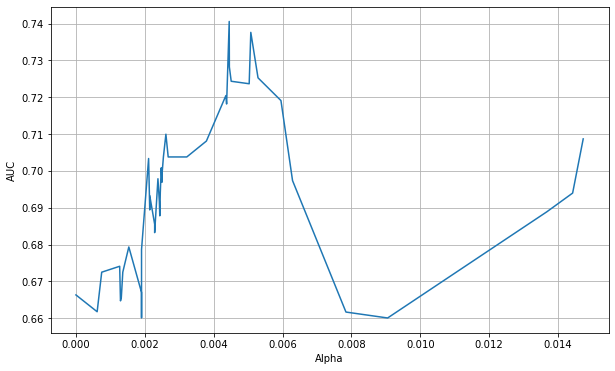

In [38]:
from sklearn.metrics import roc_auc_score

valores_auc = [roc_auc_score(test_y, arbol.predict(test_x)) for arbol in arboles]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(alphas[:-1], valores_auc[:-1])
plt.xlabel("Alpha")
plt.ylabel("AUC");

**5. Calcular la relación entre alpha y los niveles de profundidad**

Calculamos la profundidad en niveles de cada árbol generado sobre el dataset de test.

Y visualizamos el alpha contra la profundidad para ver cuando se nos empieza a hacer demasiado profundo.

Esto nos da la medida de negocio de cuando empieza a ser un árbol demasiado complejo.

El valor de alpha de 0.0045 que habíamos identificado nos llevaría a tener 8 niveles, lo cual nos encaja bastante desde negocio.

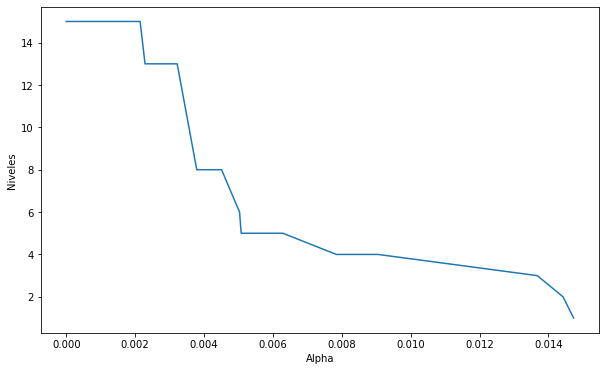

In [39]:
niveles = [arbol.tree_.max_depth for arbol in arboles]
plt.figure(figsize=(10,  6))
plt.plot(alphas[:-1], niveles[:-1])
plt.xlabel("Alpha")
plt.ylabel("Niveles");

**6. Decidir el criterio final y reentrenar el árbol**

Habiendo ya elegido un alpha de 0.0045 volvemos a reentrenar el árbol pero con ese parámetro.

También lo evaluamos y vemos que hemos aumentado bastante el auc, sabiendo además que ese nivel de complejidad no tiene mucho riesgo de sobreajustar.

In [40]:
ac = DecisionTreeClassifier(ccp_alpha=0.0045)

ac.fit(train_x,train_y)

pred = ac.predict_proba(test_x)[:,1]

roc_auc_score(test_y,pred)

0.7616269237273804

#### Revisión de los parámetros de entrenamiento

In [47]:
ac.get_params()

{'ccp_alpha': 0.0045,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### Análisis de la importancia de las variables

Podemos extraerlo con el atributo feature_importances_ y con un poco de Pandas preparar un gráfico.

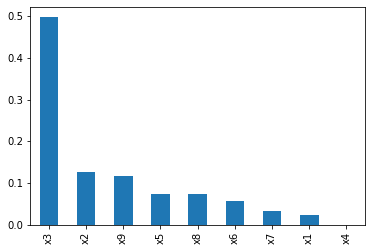

In [48]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar');

O un dataframe

In [49]:
importancia = pd.DataFrame({'variable': test_x.columns, 'importancia': ac.feature_importances_})
importancia.sort_values(by = 'importancia', ascending = False)

,variable,importancia
2,x3,0.497333
1,x2,0.125904
8,x9,0.115811
4,x5,0.073951
7,x8,0.073731
5,x6,0.057704
6,x7,0.031484
0,x1,0.024081
3,x4,0.000000


#### Visualización en texto de un árbol

Podemos una visualización de las reglas del árbol en formato de texto.

Aunque no es muy fácil de leer.

In [44]:
from sklearn.tree import export_text

print(export_text(ac, feature_names=list(test_x.columns)))

|--- x3 <= 0.06
|   |--- x8 <= 0.89
|   |   |--- x3 <= -0.54
|   |   |   |--- x2 <= -1.33
|   |   |   |   |--- x7 <= 0.12
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x7 >  0.12
|   |   |   |   |   |--- class: 1
|   |   |   |--- x2 >  -1.33
|   |   |   |   |--- x9 <= 0.40
|   |   |   |   |   |--- x2 <= -0.61
|   |   |   |   |   |   |--- x9 <= -1.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x9 >  -1.02
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x2 >  -0.61
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- x9 >  0.40
|   |   |   |   |   |--- class: 1
|   |   |--- x3 >  -0.54
|   |   |   |--- x9 <= -1.11
|   |   |   |   |--- class: 1
|   |   |   |--- x9 >  -1.11
|   |   |   |   |--- x5 <= -1.44
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- x5 >  -1.44
|   |   |   |   |   |--- class: 0
|   |--- x8 >  0.89
|   |   |--- x9 <= -2.18
|   |   |   |--- class: 1
|   |   |--- x9 >  -2.18
|   |   |   |--- x6 <= -0.12
|

#### Visualización gráfica de un árbol

Hasta la versión 0.21 de Sklearn había que tener otro paquete instalado para visualizar el árbol: graphviz.

Es posible que encuentres referencias a este método.

Pero desde esa versión Sklearn ya tiene un método nativo: plot_tree, que es el que vamos a usar.

Es importante definir a priori el tamaño del gráfico porque si no nos puede salir muy pequeño.

Hay un montón de opciones para el gráfico que se pueden ver en la documentación.

Pero yo te voy a dar la configuración que a mi me parece más útil.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

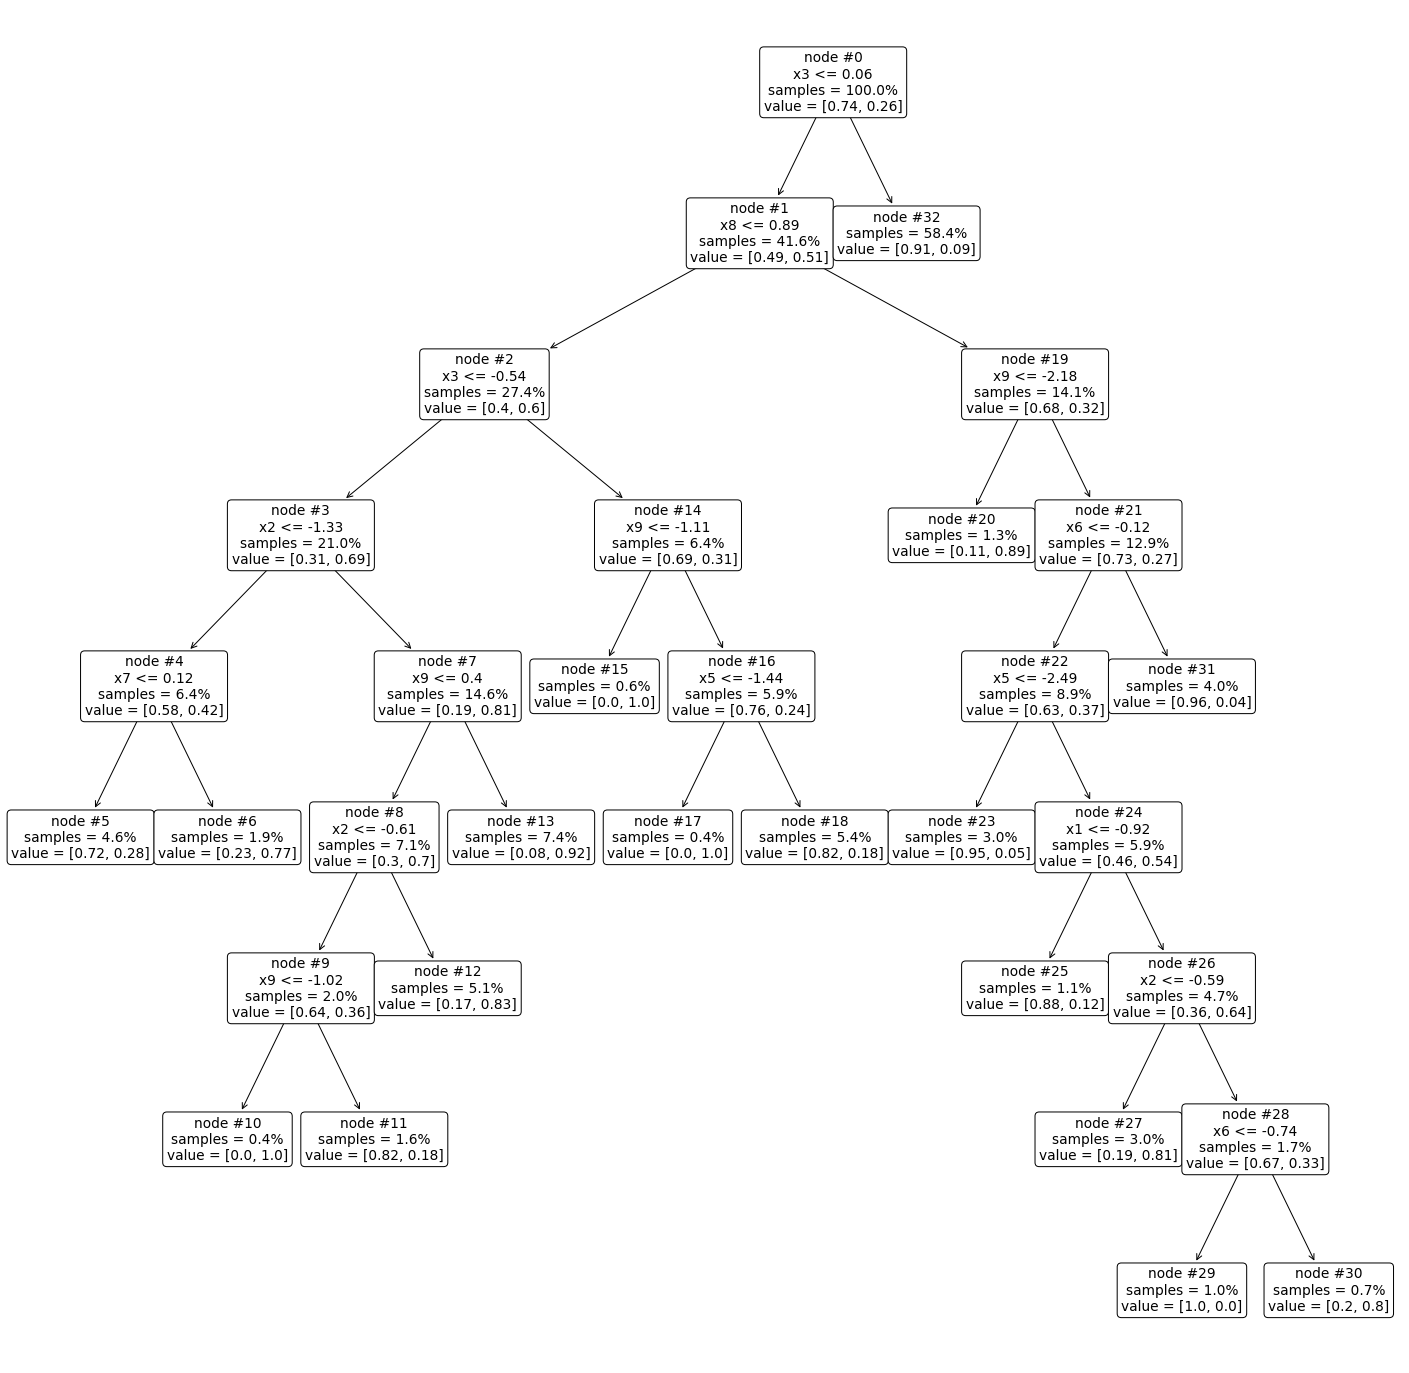

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize = (25,25))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

#### Extracción del nodo terminal de cada caso

A veces querremos saber a qué nodo pertenece cada cliente para después hacer acciones conjuntas sobre los del mismo nodo.

Podemos extraerlo con el método apply() pasándole el dataset de interés.

In [52]:
nodos = ac.apply(test_x)
nodos[:10]

array([32, 32, 12, 13, 32, 13, 32, 32, 32, 32], dtype=int64)